6 var

File stars.csv

1. Display information about the dataset, including key statistical characteristics and feature types. Identify which features are categorical and which are quantitative.  
2. Using the initial DataFrame:  
   a) Find the minimum and maximum temperatures of stars for each spectral class.  
   b) Display five main sequence stars with the highest absolute magnitude.  
   c) Add a new column containing the absolute radius of the star.  
   d) Add a new column containing the average temperature for the given type of star.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Stars.csv')

### **Basic Dataset Info:**

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [23]:
df.shape

(240, 7)

In [25]:
df.dtypes

Temperature         int64
L                 float64
R                 float64
A_M               float64
Color              object
Spectral_Class     object
Type                int64
dtype: object

In [27]:
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


### **Basic Statistical Characteristics:**

In [30]:
df.describe().round(2)

,Temperature,L,R,A_M,Type
count,240.00,240.00,240.00,240.00,240.00
mean,10497.46,107188.36,237.16,4.38,2.50
std,9552.43,179432.24,517.16,10.53,1.71
min,1939.00,0.00,0.01,-11.92,0.00
25%,3344.25,0.00,0.10,-6.23,1.00
50%,5776.00,0.07,0.76,8.31,2.50
75%,15055.50,198050.00,42.75,13.70,4.00
max,40000.00,849420.00,1948.50,20.06,5.00


#### Categorical (qualitative) characteristics describe features that cannot be measured numerically, but can only be assigned to a certain category or group

In 'stars.csv' dataset, the categorical features are: 
* Color
* Spectral_Class
* Typeor":

In [34]:
df["Color"].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object)

In [36]:
df["Color"].nunique()

17

In [38]:
df["Color"].value_counts()

Color
Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
white                   3
Yellowish White         3
yellowish               2
Whitish                 2
Orange                  2
White-Yellow            1
Pale yellow orange      1
Yellowish               1
Orange-Red              1
Blue-White              1
Name: count, dtype: int64

In [40]:
df["Color"].value_counts(normalize=True).round(3)

Color
Red                   0.467
Blue                  0.233
Blue-white            0.108
Blue White            0.042
yellow-white          0.033
White                 0.029
Blue white            0.017
white                 0.012
Yellowish White       0.012
yellowish             0.008
Whitish               0.008
Orange                0.008
White-Yellow          0.004
Pale yellow orange    0.004
Yellowish             0.004
Orange-Red            0.004
Blue-White            0.004
Name: proportion, dtype: float64

In [42]:
df["Color"].mode()

0    Red
Name: Color, dtype: object

<Axes: xlabel='Color'>

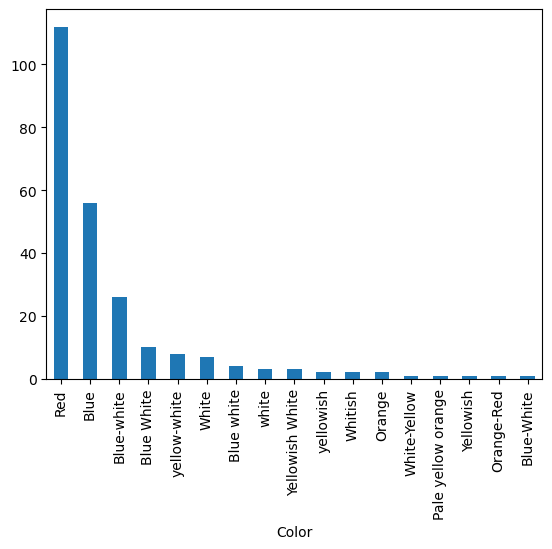

In [44]:
df["Color"].value_counts().plot.bar()

<Axes: ylabel='count'>

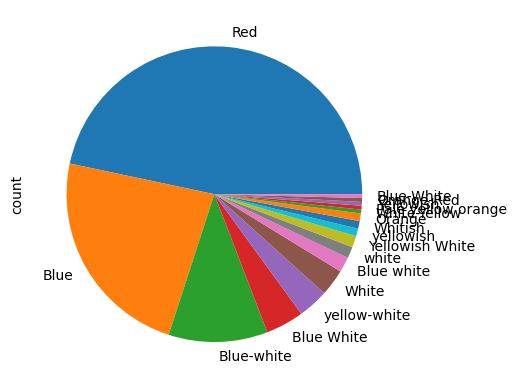

In [46]:
df["Color"].value_counts().plot.pie()

<Axes: ylabel='count'>

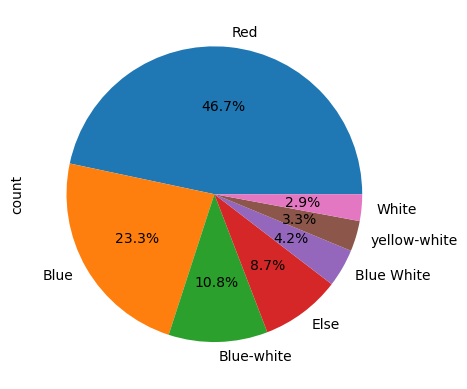

In [48]:
threshold = 5
counts = df["Color"].value_counts()
df["Color_grouped"] = df["Color"].apply(lambda x: x if counts[x] >= threshold else "Else")

df["Color_grouped"].value_counts().plot.pie(autopct='%1.1f%%')


Quantitative characteristics are:

* Temperature (temperature)
* L (luminosity)
* R (radius)
* A_M (absolute stellar magnitude)

In [51]:
df["Temperature"].mean()

10497.4625

In [53]:
df["Temperature"].median()

5776.0

In [55]:
df["Temperature"].std()

9552.42503716402

In [57]:
df["Temperature"].min(), df["Temperature"].max()

(1939, 40000)

In [59]:
df["Temperature"].quantile([0.25, 0.5, 0.75])

0.25     3344.25
0.50     5776.00
0.75    15055.50
Name: Temperature, dtype: float64

<Axes: >

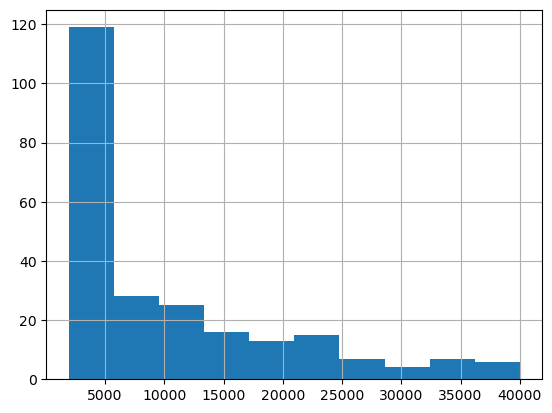

In [61]:
df["Temperature"].hist()

<Axes: ylabel='Density'>

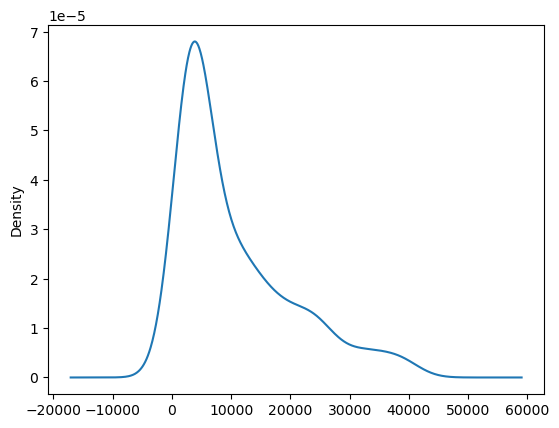

In [63]:
df["Temperature"].plot.density()

<Axes: >

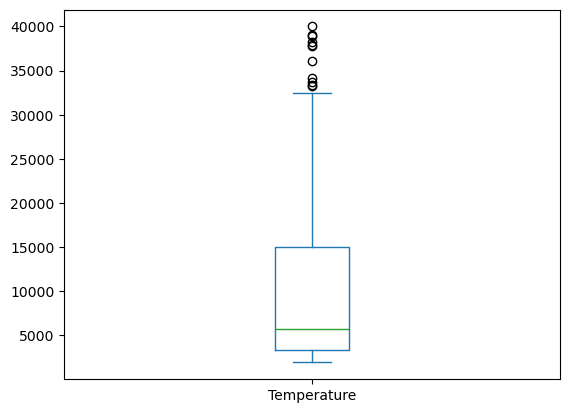

In [65]:
df["Temperature"].plot.box()

### Task 2a: Find minimum and maximum temperatures for each spectral class

In [68]:
df.groupby('Spectral_Class')['Temperature'].agg(['min', 'max'])

,min,max
Spectral_Class,,
A,7723,14060
B,9700,33750
F,5300,14732
G,6850,6850
K,4015,5112
M,1939,3834
O,5752,40000


### Task 2b: Display the five main sequence stars with the largest absolute magnitude

In [71]:
print("Number of stars of each type:")
print(df['Type'].value_counts().sort_index())

Number of stars of each type:
Type
0    40
1    40
2    40
3    40
4    40
5    40
Name: count, dtype: int64


In [73]:
print("Analysis of characteristics for each type of stars")

for star_type in sorted(df['Type'].unique()):
    stars = df[df['Type'] == star_type]
    print(f"\nType {int(star_type)}:")
    print(f"Number of stars: {len(stars)}")
    print(f"Temperature (К): {stars['Temperature'].min():.0f} - {stars['Temperature'].max():.0f}")
    print(f"Luminosity (L): {stars['L'].min():.6f} - {stars['L'].max():.0f}")
    print(f"Radius (R): {stars['R'].min():.4f} - {stars['R'].max():.1f}")
    print(f"Absolute stellar magnitude: {stars['A_M'].min():.2f} - {stars['A_M'].max():.2f}")
    print(f"Colors: {', '.join(stars['Color'].unique())}")
    print(f"Spectral classes: {', '.join(stars['Spectral_Class'].unique())}")

Analysis of characteristics for each type of stars

Type 0:
Number of stars: 40
Temperature (К): 1939 - 3531
Luminosity (L): 0.000138 - 0
Radius (R): 0.0570 - 0.2
Absolute stellar magnitude: 16.05 - 20.06
Colors: Red
Spectral classes: M

Type 1:
Number of stars: 40
Temperature (К): 2621 - 3692
Luminosity (L): 0.000190 - 0
Radius (R): 0.0980 - 0.7
Absolute stellar magnitude: 10.12 - 14.94
Colors: Red
Spectral classes: M

Type 2:
Number of stars: 40
Temperature (К): 7100 - 25000
Luminosity (L): 0.000080 - 0
Radius (R): 0.0084 - 0.0
Absolute stellar magnitude: 10.18 - 14.87
Colors: Blue White, White, Yellowish White, Blue white, Pale yellow orange, White-Yellow, white, Blue
Spectral classes: B, A, F

Type 3:
Number of stars: 40
Temperature (К): 4077 - 39000
Luminosity (L): 0.085000 - 204000
Radius (R): 0.7950 - 10.6
Absolute stellar magnitude: -4.70 - 6.51
Colors: Blue, Blue-white, Whitish, yellow-white, yellowish, Yellowish, Orange-Red, Blue-White
Spectral classes: O, B, F, A, K

Type 4:

In [75]:
print("Check Type=3 for main sequence stars")
main_sequence = df[df['Type'] == 3]
correlation = main_sequence['Temperature'].corr(main_sequence['L'])
print(f"Temperature and luminosity correlation: {correlation:.4f}")
print(f"Temperature range: {main_sequence['Temperature'].min():.0f} - {main_sequence['Temperature'].max():.0f} K")
print(f"Luminosity Range: {main_sequence['L'].min():.3f} - {main_sequence['L'].max():.0f} L")
print(f"Radius range: {main_sequence['R'].min():.3f} - {main_sequence['R'].max():.3f} R")

Check Type=3 for main sequence stars
Temperature and luminosity correlation: 0.8026
Temperature range: 4077 - 39000 K
Luminosity Range: 0.085 - 204000 L
Radius range: 0.795 - 10.600 R


In [77]:
print("Comparing median values ​​by type")

median_values = df.groupby('Type')[['Temperature', 'L', 'R']].median()
median_values

Comparing median values ​​by type


,Temperature,L,R
Type,,,
0,2935.0,0.00052,0.1060
1,3314.0,0.00315,0.3380
2,13380.0,0.00076,0.0102
3,12560.5,738.50000,5.7125
4,12821.0,242145.00000,43.5000
5,3766.0,266500.00000,1352.5000


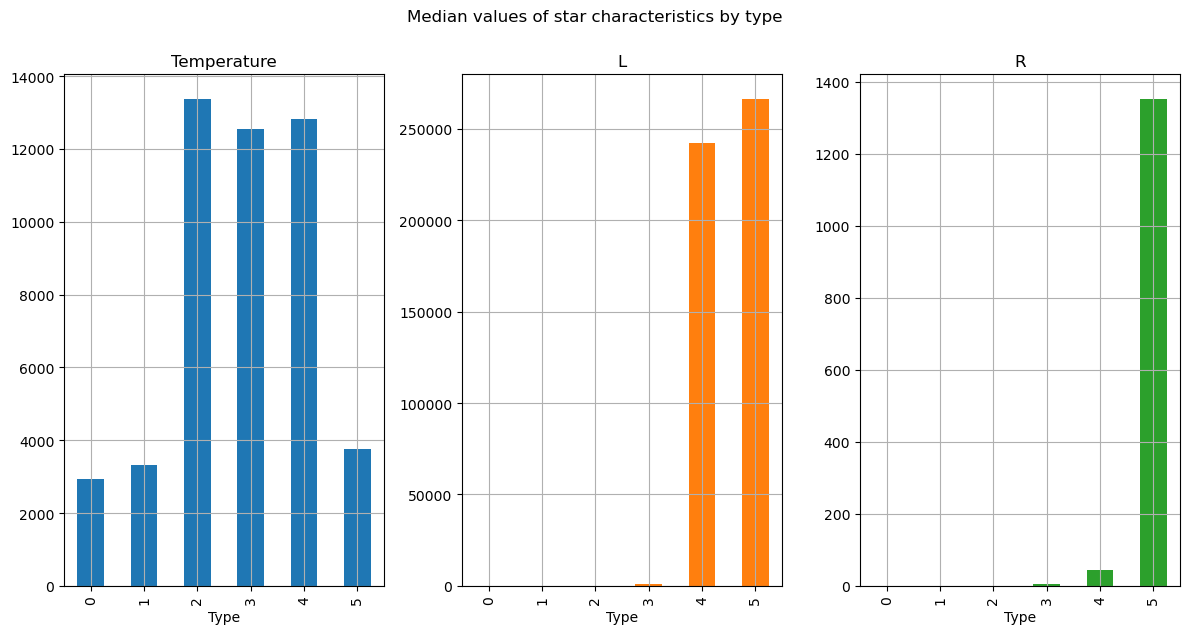

In [79]:
median_values.plot(kind='bar', figsize=(12, 6), subplots=True, layout=(1, 3), 
                   sharex=True, legend=False, grid=True)
plt.tight_layout()
plt.suptitle('Median values ​​of star characteristics by type', y=1.05)
plt.show()

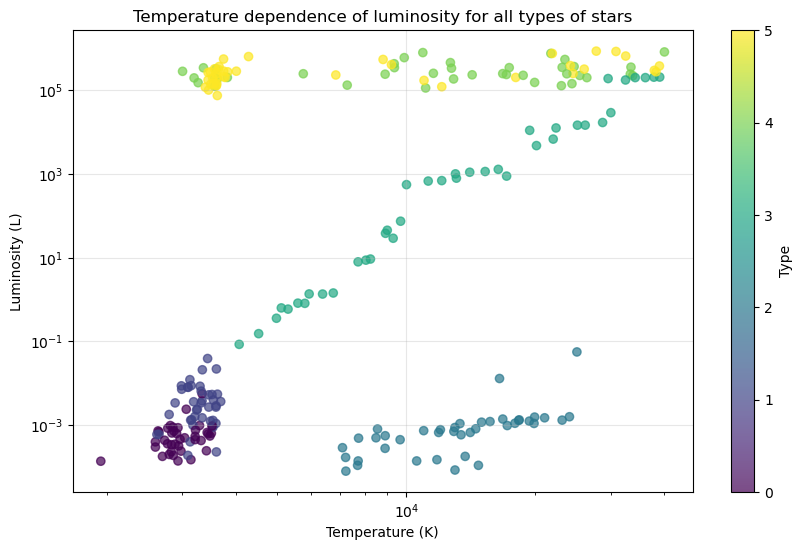

In [81]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature'], df['L'], c=df['Type'], cmap='viridis', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.colorbar(label='Type')
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity (L)')
plt.title('Temperature dependence of luminosity for all types of stars')
plt.grid(True, alpha=0.3)
plt.show()

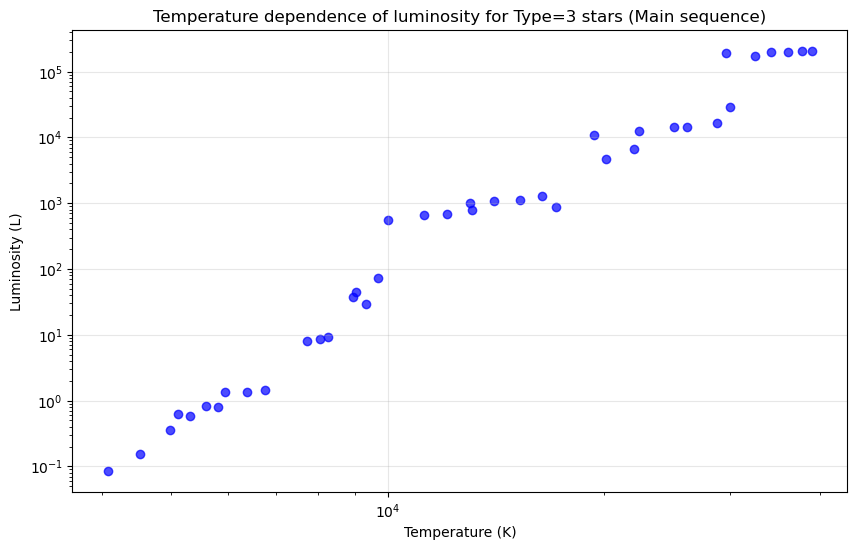

In [83]:
plt.figure(figsize=(10, 6))
plt.scatter(main_sequence['Temperature'], main_sequence['L'], c='blue', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity (L)')
plt.title('Temperature dependence of luminosity for Type=3 stars (Main sequence)')
plt.grid(True, alpha=0.3)
plt.show()

In [85]:
print("Top 5 Brightest Main Sequence Stars (Type=3)")
brightest_ms = main_sequence.sort_values('A_M').head(5)
brightest_ms[['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class']]

Top 5 Brightest Main Sequence Stars (Type=3)


,Temperature,L,R,A_M,Color,Spectral_Class
30,39000,204000.0,10.600,-4.70,Blue,O
214,34190,198200.0,6.390,-4.57,Blue,O
159,37800,202900.0,6.860,-4.56,Blue,O
99,36108,198000.0,10.200,-4.40,Blue,O
215,32460,173800.0,6.237,-4.36,Blue,O


### Task 2c: Add a new column containing the absolute radius of the star

In [88]:
SUN_RADIUS_KM = 695700

In [90]:
df['Absolute_Radius_km'] = df['R'] * SUN_RADIUS_KM

In [92]:
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type,Color_grouped,Absolute_Radius_km
0,3068,0.002400,0.1700,16.12,Red,M,0,Red,118269.00
1,3042,0.000500,0.1542,16.60,Red,M,0,Red,107276.94
2,2600,0.000300,0.1020,18.70,Red,M,0,Red,70961.40
3,2800,0.000200,0.1600,16.65,Red,M,0,Red,111312.00
4,1939,0.000138,0.1030,20.06,Red,M,0,Red,71657.10


### Task 2d: Add a new column containing the average temperature for the given star type

In [95]:
avg_temp_by_type = df.groupby('Type')['Temperature'].mean()

In [97]:
df['Avg_Temp_By_Type'] = df['Type'].map(avg_temp_by_type)

In [99]:
df.head(15)

,Temperature,L,R,A_M,Color,Spectral_Class,Type,Color_grouped,Absolute_Radius_km,Avg_Temp_By_Type
0,3068,0.002400,0.1700,16.120,Red,M,0,Red,118269.00,2997.950
1,3042,0.000500,0.1542,16.600,Red,M,0,Red,107276.94,2997.950
2,2600,0.000300,0.1020,18.700,Red,M,0,Red,70961.40,2997.950
3,2800,0.000200,0.1600,16.650,Red,M,0,Red,111312.00,2997.950
4,1939,0.000138,0.1030,20.060,Red,M,0,Red,71657.10,2997.950
5,2840,0.000650,0.1100,16.980,Red,M,0,Red,76527.00,2997.950
6,2637,0.000730,0.1270,17.220,Red,M,0,Red,88353.90,2997.950
7,2600,0.000400,0.0960,17.400,Red,M,0,Red,66787.20,2997.950
8,2650,0.000690,0.1100,17.450,Red,M,0,Red,76527.00,2997.950
9,2700,0.000180,0.1300,16.050,Red,M,0,Red,90441.00,2997.950


File bike.csv

1. Construct bar charts to display
a) the number of buyers of different professions;
b) the median income of buyers of different professions;
c) the average age of buyers of different professions, divided into those who bought a bicycle and those who did not.

3. Construct a histogram of the number of children, total and depending on the purchase of a bicycle.

5. Construct a diagram of the range of income (total and depending on the level of education), determine whether there are outliers.

7. Using scatter diagrams, draw conclusions about the relationship between
a) income and age;
b) the number of children and cars. Calculate the correlation coefficient using the appropriate functions.

In [103]:
df = pd.read_csv('bike.csv')

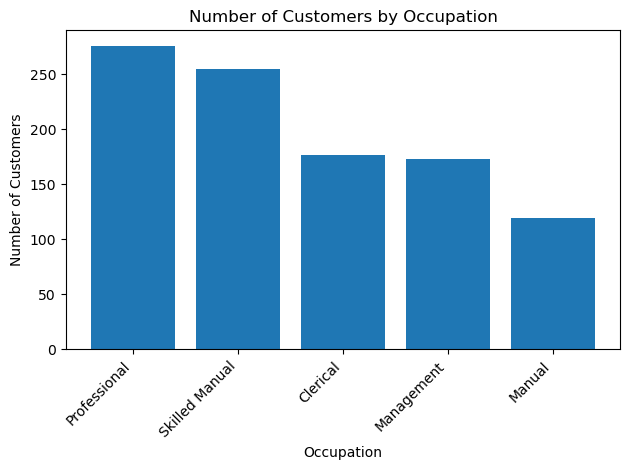

In [105]:
# 1a
counts = df['Occupation'].value_counts()
plt.figure()
plt.bar(counts.index, counts.values)
plt.xlabel('Occupation')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Occupation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

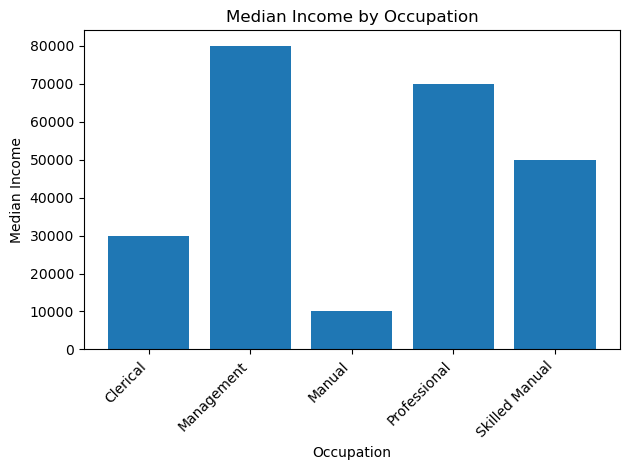

In [111]:
# 1b
income_median = df.groupby('Occupation')['Income'].median()
plt.figure()
plt.bar(income_median.index, income_median.values)
plt.xlabel('Occupation')
plt.ylabel('Median Income')
plt.title('Median Income by Occupation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

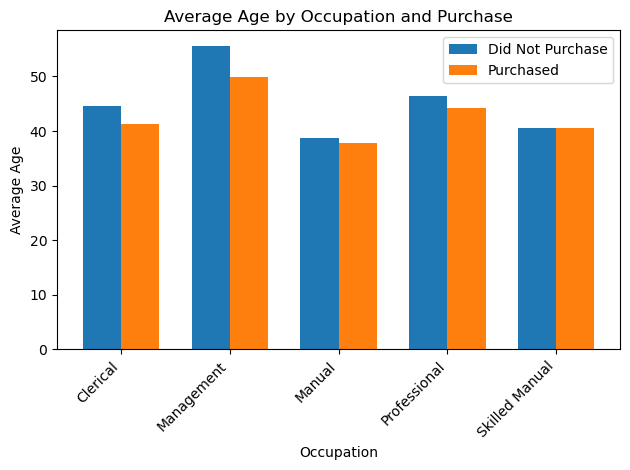

In [113]:
# 1c
avg_age = df.groupby(['Occupation', 'Purchased Bike'])['Age'].mean().unstack()
x = np.arange(len(avg_age.index))
width = 0.35

plt.figure()
plt.bar(x - width/2, avg_age['No'], width, label='Did Not Purchase')
plt.bar(x + width/2, avg_age['Yes'], width, label='Purchased')
plt.xlabel('Occupation')
plt.ylabel('Average Age')
plt.title('Average Age by Occupation and Purchase')
plt.xticks(x, avg_age.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()

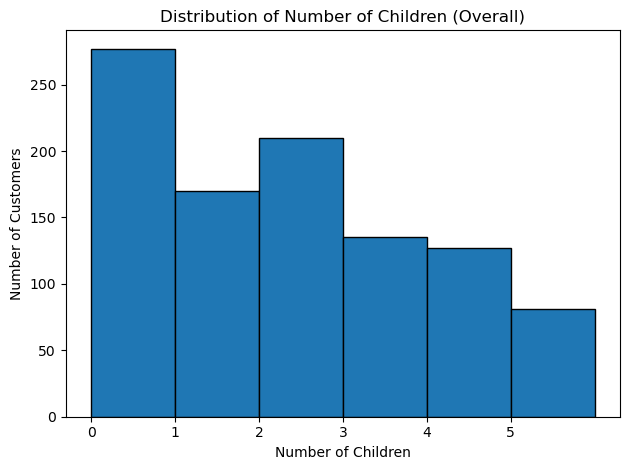

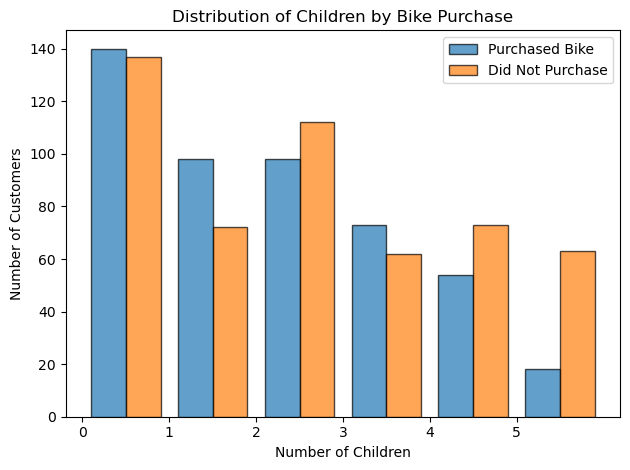

In [115]:
bins = np.arange(0, df['Children'].max() + 2)  # [0,1,2,3,4,5,6]

plt.figure()
plt.hist(df['Children'], bins=bins, edgecolor='black')
plt.xlabel('Number of Children')
plt.ylabel('Number of Customers')
plt.title('Distribution of Number of Children (Overall)')
plt.xticks(bins[:-1])        
plt.tight_layout()

plt.figure()
plt.hist(
    [df[df['Purchased Bike'] == 'Yes']['Children'],
     df[df['Purchased Bike'] == 'No']['Children']],
    bins=bins,
    stacked=False,  
    label=['Purchased Bike', 'Did Not Purchase'],
    edgecolor='black',
    alpha=0.7
)
plt.xlabel('Number of Children')
plt.ylabel('Number of Customers')
plt.title('Distribution of Children by Bike Purchase')
plt.xticks(bins[:-1])
plt.legend()
plt.tight_layout()

plt.show()

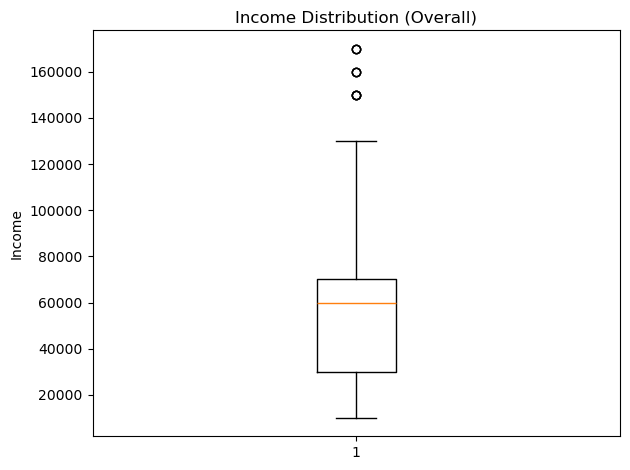

In [117]:
# 3 
plt.figure()
plt.boxplot(df['Income'], vert=True)
plt.ylabel('Income')
plt.title('Income Distribution (Overall)')
plt.tight_layout()

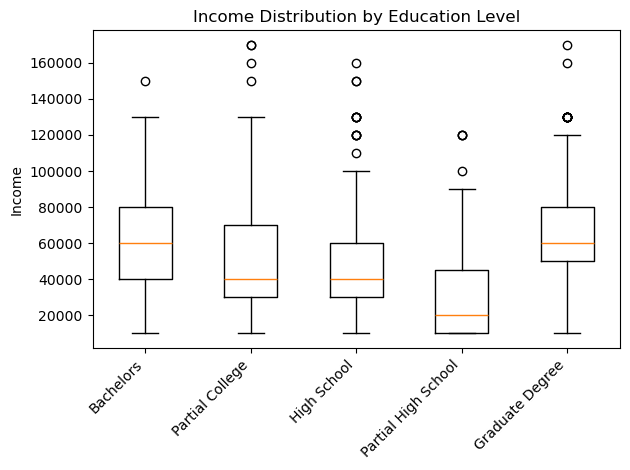

In [119]:
plt.figure()
education_levels = df['Education'].unique()
data = [df[df['Education'] == lvl]['Income'] for lvl in education_levels]
plt.boxplot(data, vert=True)
plt.xticks(range(1, len(education_levels) + 1), education_levels, rotation=45, ha='right')
plt.ylabel('Income')
plt.title('Income Distribution by Education Level')
plt.tight_layout()

In [121]:
def count_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = series[(series < lower) | (series > upper)]
    return len(outliers), lower, upper

In [123]:
overall_outliers, low_o, high_o = count_outliers(df['Income'])
print(f"Overall: {overall_outliers} outliers; whiskers [{low_o:.0f}, {high_o:.0f}]")

Overall: 10 outliers; whiskers [-30000, 130000]


In [125]:
for lvl in education_levels:
    n_out, low, high = count_outliers(df[df['Education'] == lvl]['Income'])
    print(f"{lvl}: {n_out} outliers; whiskers [{low:.0f}, {high:.0f}]")

plt.show()

Bachelors: 1 outliers; whiskers [-20000, 140000]
Partial College: 4 outliers; whiskers [-30000, 130000]
High School: 13 outliers; whiskers [-15000, 105000]
Partial High School: 4 outliers; whiskers [-42500, 97500]
Graduate Degree: 13 outliers; whiskers [5000, 125000]


In [138]:
import pandas as pd
from IPython.display import display

summary_data = {
    "Level": [
        "All Customers",
        "Bachelors",
        "Partial College",
        "High School",
        "Partial High School",
        "Graduate Degree",
    ],
    "Outliers": [10, 1, 4, 13, 4, 13],
    "Comment": [
        "Several incomes > 130k well above upper whisker",
        "Only one very high income (~150k)",
        "Longer upper tail; several > 130k",
        "Most volatile group: both low and high extremes",
        "Whiskers wider; few outliers",
        "More high incomes > 125k typical for graduates",
    ],
}

summary_df = pd.DataFrame(summary_data)

display(summary_df)


,Level,Outliers,Comment
0,All Customers,10,Several incomes > 130k well above upper whisker
1,Bachelors,1,Only one very high income (~150k)
2,Partial College,4,Longer upper tail; several > 130k
3,High School,13,Most volatile group: both low and high extremes
4,Partial High School,4,Whiskers wider; few outliers
5,Graduate Degree,13,More high incomes > 125k typical for graduates


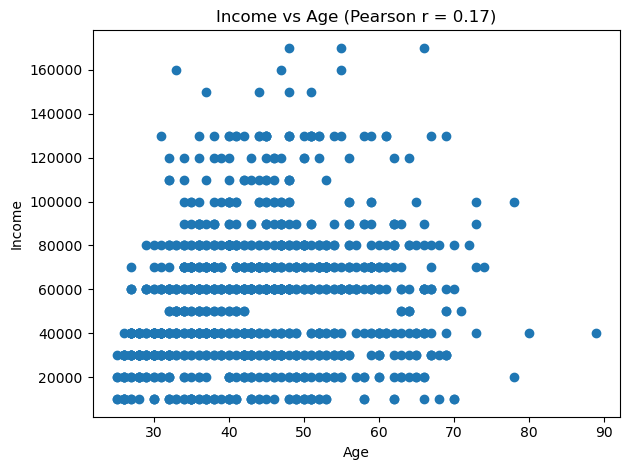

In [133]:
# 4a Income vs Age
corr_income_age = df["Income"].corr(df["Age"])

plt.figure()
plt.scatter(df["Age"], df["Income"])
plt.xlabel("Age")
plt.ylabel("Income")
plt.title(f"Income vs Age (Pearson r = {corr_income_age:.2f})")
plt.tight_layout()

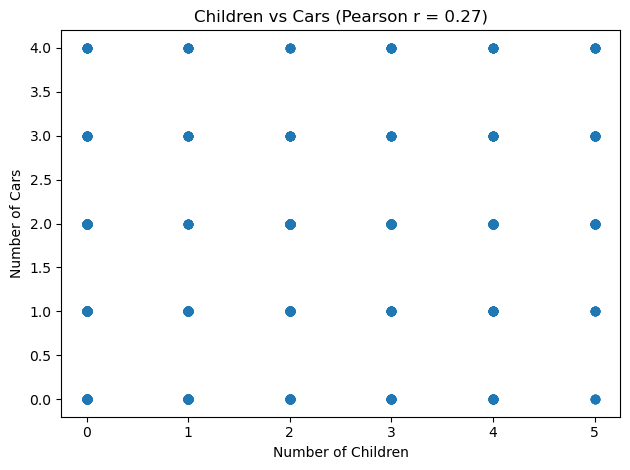

In [135]:
# 4b Children vs Cars
corr_children_cars = df["Children"].corr(df["Cars"])

plt.figure()
plt.scatter(df["Children"], df["Cars"])
plt.xlabel("Number of Children")
plt.ylabel("Number of Cars")
plt.title(f"Children vs Cars (Pearson r = {corr_children_cars:.2f})")
plt.tight_layout()

Points are widely scattered in both plots, confirming low-to-moderate relationships. No obvious nonlinear structure—Pearson is therefore sufficient as a first pass.